In [1]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

## イメージの読み込み

In [68]:
# read an image
img = cv2.imread('img/sapporo.JPG')

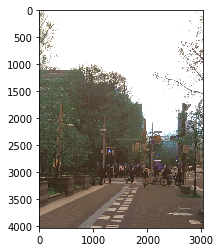

In [24]:
# show original image
plt.imshow(img)

## 画像のスムージング(ガウスぼかし)

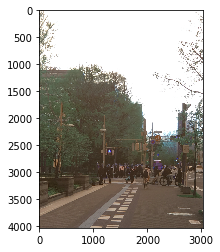

In [25]:
# gaussian blurring with a 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img_blur_small)

## HSV画像に変換

In [26]:
# convert image to RGB color for matplotlib
img_HSV = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2HSV)

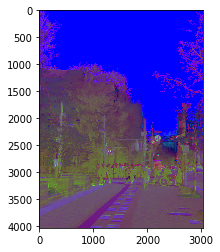

In [27]:
# show hsv image
plt.imshow(img_HSV)

## 閾値設定

In [28]:
# threshold for hue channel in blue range
green_min = np.array([0, 20, 0], np.uint8)
green_max = np.array([100, 255, 180], np.uint8)
threshold_green_img = cv2.inRange(img_HSV, green_min, green_max) 
threshold_green_img = cv2.cvtColor(threshold_green_img, cv2.COLOR_GRAY2RGB)

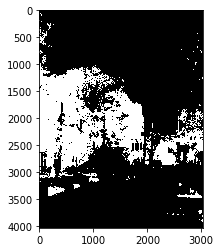

In [42]:
# show image
plt.imshow(threshold_green_img)

## 画像のマスキング

In [49]:
mask_rgb = cv2.bitwise_and(img, threshold_green_img)

In [105]:
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_img = cv2.bitwise_and(img, mask_rgb)
mask_background = cv2.bitwise_not(threshold_green_img)

masked_replace_white = cv2.addWeighted(masked_img, 1, mask_background, 1, 2)

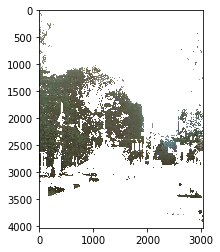

In [106]:
plt.imshow(masked_replace_white)